In [2]:
# Read data (dga_data.csv) from sample_data
import pandas as pd
dga_data = pd.read_csv('dga_data.csv')
dga_data.head()

,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker


In [3]:
# Encode the column isDGA to 0 or 1
dga_data['isDGA'] = dga_data['isDGA'].apply(lambda x: 1 if x == 'dga' else 0)
dga_data.head()

,isDGA,domain,host,subclass
0,1,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,1,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,1,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,1,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,1,jpqftymiuver,jpqftymiuver.ru,cryptolocker


In [4]:
# Check number of isDGA values that are equal to 1
dga_data['isDGA'].value_counts()

,count
isDGA,
1,80000
0,80000


### Exactly half (80,000) of the inputs are dga and the other half (80,000) are legit

In [5]:
# Count the number of each subclass
dga_data['subclass'].value_counts()

,count
subclass,
alexa,42616
legit,37384
cryptolocker,37254
newgoz,9276
gameoverdga,8461
nivdort,8456
necurs,8331
goz,6136
bamital,2086


In [6]:
# Delete missing or duplicate values
dga_data = dga_data.dropna()
dga_data = dga_data.drop_duplicates()
dga_data.count()

,0
isDGA,159998
domain,159998
host,159998
subclass,159998


### Eliminated two inputs whose hosts were missing

In [7]:
#Convert all domain and host strings to lowercase. Remove any invalid characters or additional dots
dga_data['domain'] = dga_data['domain'].apply(lambda x: x.lower())
dga_data['host'] = dga_data['host'].apply(lambda x: x.lower())
dga_data

,isDGA,domain,host,subclass
0,1,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,1,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,1,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,1,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,1,jpqftymiuver,jpqftymiuver.ru,cryptolocker
...,...,...,...,...
159995,0,manhunt,manhunt.net,alexa
159996,0,yupptv,yupptv.com,alexa
159997,0,bbcmundo,bbcmundo.com,legit
159998,0,kanogames,kanogames.com,legit


In [8]:
# Remove dots and perform character based tokenization
dga_data['domain'] = dga_data['domain'].apply(lambda x: list(x.replace('.', '')))
dga_data['host'] = dga_data['host'].apply(lambda x: list(x.replace('.', '')))
dga_data

,isDGA,domain,host,subclass
0,1,"[6, x, z, x, s, w, 3, s, o, k, v, g, 1, t, c, ...","[6, x, z, x, s, w, 3, s, o, k, v, g, 1, t, c, ...",gameoverdga
1,1,"[g, l, b, t, l, x, w, w, h, b, n, p, x, s]","[g, l, b, t, l, x, w, w, h, b, n, p, x, s, r, u]",cryptolocker
2,1,"[x, x, m, a, m, o, p, y, i, p, b, f, p, k]","[x, x, m, a, m, o, p, y, i, p, b, f, p, k, r, u]",cryptolocker
3,1,"[z, f, d, 5, s, z, p, i, 1, 8, i, 8, 5, w, j, ...","[z, f, d, 5, s, z, p, i, 1, 8, i, 8, 5, w, j, ...",newgoz
4,1,"[j, p, q, f, t, y, m, i, u, v, e, r]","[j, p, q, f, t, y, m, i, u, v, e, r, r, u]",cryptolocker
...,...,...,...,...
159995,0,"[m, a, n, h, u, n, t]","[m, a, n, h, u, n, t, n, e, t]",alexa
159996,0,"[y, u, p, p, t, v]","[y, u, p, p, t, v, c, o, m]",alexa
159997,0,"[b, b, c, m, u, n, d, o]","[b, b, c, m, u, n, d, o, c, o, m]",legit
159998,0,"[k, a, n, o, g, a, m, e, s]","[k, a, n, o, g, a, m, e, s, c, o, m]",legit


In [9]:
# Find average length of domains and longest length
avg_length = dga_data['domain'].apply(len).mean()
print(avg_length)
max_length = dga_data['domain'].apply(len).max()
print(max_length)

13.467462093276167
60


In [10]:
# Set maximum domain name length to 30 and pad shorter domains and truncate longer ones
max_length = 30
dga_data['domain'] = dga_data['domain'].apply(lambda x: x[:max_length] + ['0'] * (max_length - len(x)))
dga_data

,isDGA,domain,host,subclass
0,1,"[6, x, z, x, s, w, 3, s, o, k, v, g, 1, t, c, ...","[6, x, z, x, s, w, 3, s, o, k, v, g, 1, t, c, ...",gameoverdga
1,1,"[g, l, b, t, l, x, w, w, h, b, n, p, x, s, 0, ...","[g, l, b, t, l, x, w, w, h, b, n, p, x, s, r, u]",cryptolocker
2,1,"[x, x, m, a, m, o, p, y, i, p, b, f, p, k, 0, ...","[x, x, m, a, m, o, p, y, i, p, b, f, p, k, r, u]",cryptolocker
3,1,"[z, f, d, 5, s, z, p, i, 1, 8, i, 8, 5, w, j, ...","[z, f, d, 5, s, z, p, i, 1, 8, i, 8, 5, w, j, ...",newgoz
4,1,"[j, p, q, f, t, y, m, i, u, v, e, r, 0, 0, 0, ...","[j, p, q, f, t, y, m, i, u, v, e, r, r, u]",cryptolocker
...,...,...,...,...
159995,0,"[m, a, n, h, u, n, t, 0, 0, 0, 0, 0, 0, 0, 0, ...","[m, a, n, h, u, n, t, n, e, t]",alexa
159996,0,"[y, u, p, p, t, v, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[y, u, p, p, t, v, c, o, m]",alexa
159997,0,"[b, b, c, m, u, n, d, o, 0, 0, 0, 0, 0, 0, 0, ...","[b, b, c, m, u, n, d, o, c, o, m]",legit
159998,0,"[k, a, n, o, g, a, m, e, s, 0, 0, 0, 0, 0, 0, ...","[k, a, n, o, g, a, m, e, s, c, o, m]",legit


In [11]:
# Create numerical encodings for the characters

from tensorflow.keras.preprocessing.text import Tokenizer

# Join the list of characters back into strings for tokenization.
hosts_str = dga_data['host'].apply(''.join)

# Create a character-level tokenizer.
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(hosts_str)

# Convert each host into its numeric sequence.
dga_data['host_encoded'] = tokenizer.texts_to_sequences(hosts_str)
dga_data

,isDGA,domain,host,subclass,host_encoded
0,1,"[6, x, z, x, s, w, 3, s, o, k, v, g, 1, t, c, ...","[6, x, z, x, s, w, 3, s, o, k, v, g, 1, t, c, ...",gameoverdga,"[35, 24, 27, 24, 11, 21, 29, 11, 1, 19, 22, 14..."
1,1,"[g, l, b, t, l, x, w, w, h, b, n, p, x, s, 0, ...","[g, l, b, t, l, x, w, w, h, b, n, p, x, s, r, u]",cryptolocker,"[14, 12, 15, 8, 12, 24, 21, 21, 17, 15, 7, 16,..."
2,1,"[x, x, m, a, m, o, p, y, i, p, b, f, p, k, 0, ...","[x, x, m, a, m, o, p, y, i, p, b, f, p, k, r, u]",cryptolocker,"[24, 24, 5, 6, 5, 1, 16, 20, 9, 16, 15, 18, 16..."
3,1,"[z, f, d, 5, s, z, p, i, 1, 8, i, 8, 5, w, j, ...","[z, f, d, 5, s, z, p, i, 1, 8, i, 8, 5, w, j, ...",newgoz,"[27, 18, 13, 31, 11, 27, 16, 9, 23, 34, 9, 34,..."
4,1,"[j, p, q, f, t, y, m, i, u, v, e, r, 0, 0, 0, ...","[j, p, q, f, t, y, m, i, u, v, e, r, r, u]",cryptolocker,"[25, 16, 26, 18, 8, 20, 5, 9, 10, 22, 2, 3, 3,..."
...,...,...,...,...,...
159995,0,"[m, a, n, h, u, n, t, 0, 0, 0, 0, 0, 0, 0, 0, ...","[m, a, n, h, u, n, t, n, e, t]",alexa,"[5, 6, 7, 17, 10, 7, 8, 7, 2, 8]"
159996,0,"[y, u, p, p, t, v, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[y, u, p, p, t, v, c, o, m]",alexa,"[20, 10, 16, 16, 8, 22, 4, 1, 5]"
159997,0,"[b, b, c, m, u, n, d, o, 0, 0, 0, 0, 0, 0, 0, ...","[b, b, c, m, u, n, d, o, c, o, m]",legit,"[15, 15, 4, 5, 10, 7, 13, 1, 4, 1, 5]"
159998,0,"[k, a, n, o, g, a, m, e, s, 0, 0, 0, 0, 0, 0, ...","[k, a, n, o, g, a, m, e, s, c, o, m]",legit,"[19, 6, 7, 1, 14, 6, 5, 2, 11, 4, 1, 5]"


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# pad your host_encoded lists to shape (n_samples, MAX_LEN)
X = pad_sequences(
    dga_data['host_encoded'].tolist(),
    maxlen=max_length,
    padding='post',
    truncating='post',
    value=0
)

y = dga_data['isDGA'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


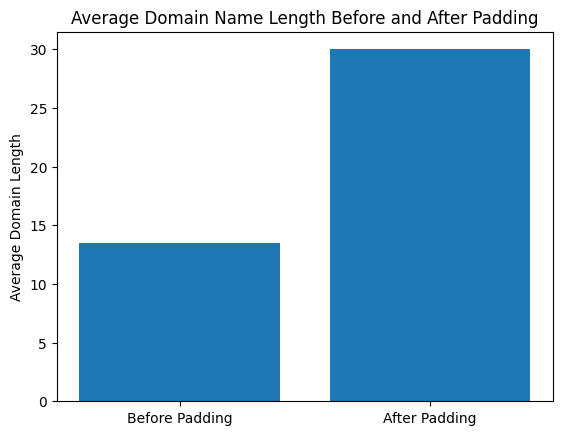

In [15]:
import matplotlib.pyplot as plt

# Example average lengths
before_padding = avg_length
after_padding = 30.0

# Data and labels
lengths = [before_padding, after_padding]
labels = ['Before Padding', 'After Padding']

# Plot
plt.bar(labels, lengths)
plt.ylabel('Average Domain Length')
plt.title('Average Domain Name Length Before and After Padding')
plt.show()


In [ ]:
#Create CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# parameters (use the same MAX_LEN as your padding step)
MAX_LEN = 30
EMBEDDING_DIM = 50

# infer vocab size from your encoded data
VOCAB_SIZE = max(max(seq) for seq in dga_data['host_encoded']) + 1

cnn = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Create an LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# parameters (reuse the same MAX_LEN, EMBEDDING_DIM, VOCAB_SIZE)
lstm = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

lstm.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Note: Ensure that the CNN model (variable `model`) from your previous cell is already defined.
history = cnn.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# --- Evaluate the Model on Test Data ---
# Get prediction probabilities on the test set.
y_pred_probs = cnn.predict(X_test)
# Convert probabilities to binary class predictions using a threshold of 0.5.
y_pred = (y_pred_probs > 0.5).astype(int)

# Compute evaluation metrics.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))


Epoch 1/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9261 - loss: 0.1842 - val_accuracy: 0.9814 - val_loss: 0.0526
Epoch 2/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9823 - loss: 0.0503 - val_accuracy: 0.9852 - val_loss: 0.0437
Epoch 3/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9885 - loss: 0.0338 - val_accuracy: 0.9891 - val_loss: 0.0333
Epoch 4/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9920 - loss: 0.0242 - val_accuracy: 0.9891 - val_loss: 0.0338
Epoch 5/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9937 - loss: 0.0183 - val_accuracy: 0.9895 - val_loss: 0.0345
Epoch 6/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9953 - loss: 0.0150 - val_accuracy: 0.9898 - val_loss: 0.0313
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9965 - loss: 0.0117 - val_accuracy: 0.9909 - val_loss: 0.0308
Epoch 8/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9968 - loss: 0.0097 - 

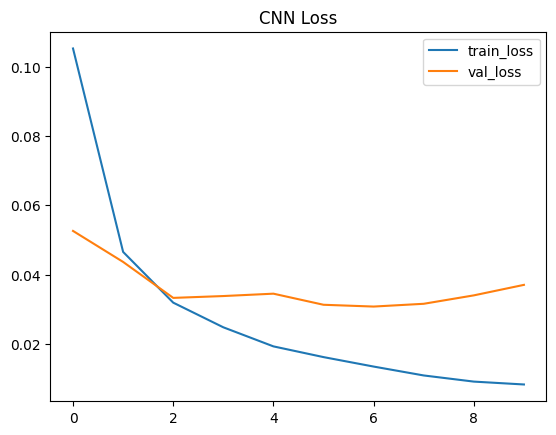

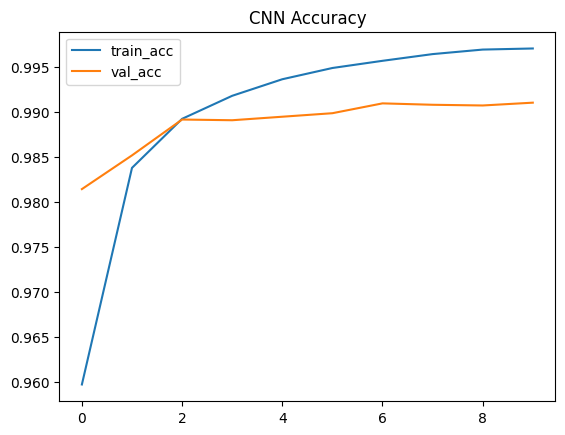

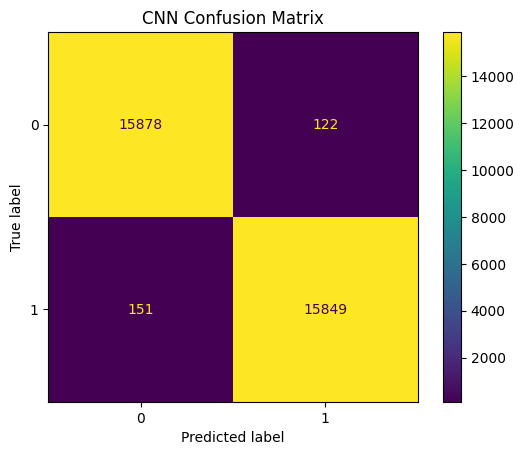

In [ ]:
# ---- Capture CNN metrics & visualisations ----
# Save metrics before they are overwritten
accuracy_cnn, precision_cnn, recall_cnn, f1_cnn = accuracy, precision, recall, f1
history_cnn = history

import matplotlib.pyplot as plt
plt.figure()
plt.plot(history_cnn.history['loss'], label='train_loss')
plt.plot(history_cnn.history['val_loss'], label='val_loss')
plt.title('CNN Loss')
plt.legend()
plt.show()

acc_key = 'accuracy' if 'accuracy' in history_cnn.history else 'acc'
val_acc_key = 'val_accuracy' if 'val_accuracy' in history_cnn.history else 'val_acc'
plt.figure()
plt.plot(history_cnn.history[acc_key], label='train_acc')
plt.plot(history_cnn.history[val_acc_key], label='val_acc')
plt.title('CNN Accuracy')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_mat_cnn = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_mat_cnn).plot()
plt.title('CNN Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Train the LSTM Model ---
history = lstm.fit(X_train, y_train, epochs=5, batch_size=256, validation_split=0.1)

# --- Evaluate the Model on Test Data ---
# Get prediction probabilities on the test set.
y_pred_probs = lstm.predict(X_test)
# Convert probabilities to binary class predictions using a threshold of 0.5.
y_pred = (y_pred_probs > 0.5).astype(int)

# Compute evaluation metrics.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))


Epoch 1/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.8763 - loss: 0.2668 - val_accuracy: 0.9474 - val_loss: 0.1257
Epoch 2/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 61s 136ms/step - accuracy: 0.9563 - loss: 0.1103 - val_accuracy: 0.9669 - val_loss: 0.0872
Epoch 3/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.9654 - loss: 0.0923 - val_accuracy: 0.9663 - val_loss: 0.0875
Epoch 4/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.9692 - loss: 0.0823 - val_accuracy: 0.9752 - val_loss: 0.0703
Epoch 5/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 83s 140ms/step - accuracy: 0.9726 - loss: 0.0744 - val_accuracy: 0.9757 - val_loss: 0.0679
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step
Accuracy: 0.9767
Precision: 0.9824
Recall: 0.9709
F1-score: 0.9766


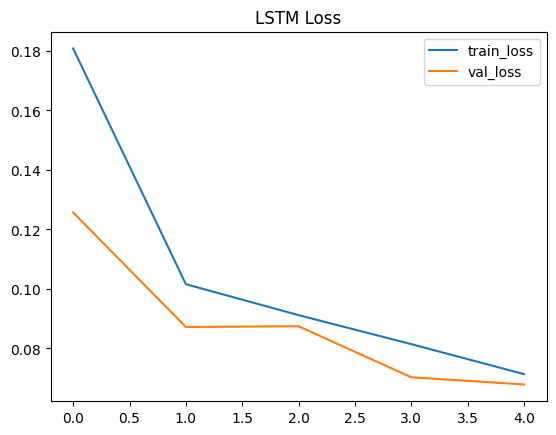

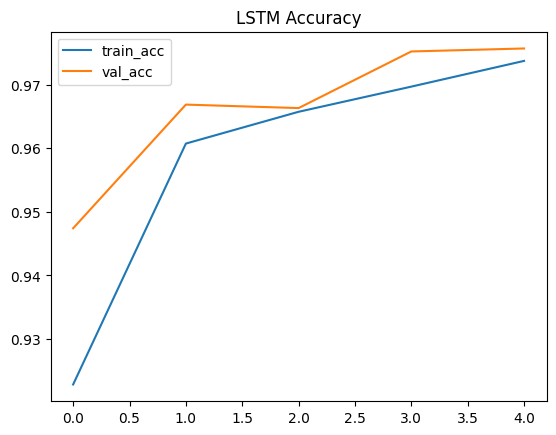

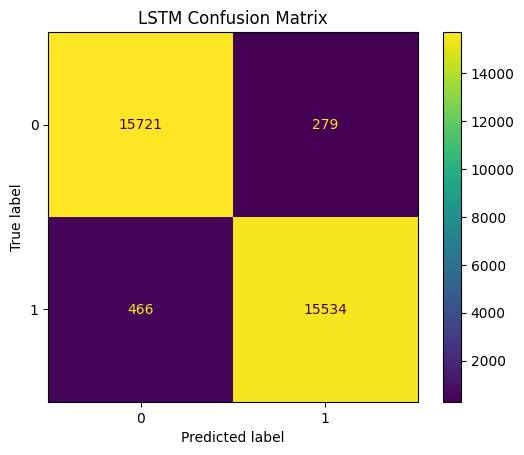

In [ ]:
# ---- Capture LSTM metrics & visualisations ----
accuracy_lstm, precision_lstm, recall_lstm, f1_lstm = accuracy, precision, recall, f1
history_lstm = history

import matplotlib.pyplot as plt
plt.figure()
plt.plot(history_lstm.history['loss'], label='train_loss')
plt.plot(history_lstm.history['val_loss'], label='val_loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()

acc_key = 'accuracy' if 'accuracy' in history_lstm.history else 'acc'
val_acc_key = 'val_accuracy' if 'val_accuracy' in history_lstm.history else 'val_acc'
plt.figure()
plt.plot(history_lstm.history[acc_key], label='train_acc')
plt.plot(history_lstm.history[val_acc_key], label='val_acc')
plt.title('LSTM Accuracy')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_mat_lstm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_mat_lstm).plot()
plt.title('LSTM Confusion Matrix')
plt.show()

## Now we will work on the subclass classification. We will use one hot encoding to map the categorical features of both legitimate and dga data separately.

### FIrst, we will create two models for CNN, one for legit subclasses and one for DGA subclasses. We will also do the same for LSTM.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
)

# reuse these from your binary setup
MAX_LEN = 30
EMBEDDING_DIM = 50
VOCAB_SIZE = max(max(seq) for seq in dga_data['host_encoded']) + 1

# 1) DGA‐family subclass (e.g. gameoverdga, cryptolocker…)
dga_df = dga_data[dga_data['isDGA'] == 1]

# pad sequences
X_dga = pad_sequences(
    dga_df['host_encoded'].tolist(),
    maxlen=MAX_LEN,
    padding='post',
    truncating='post'
)

# encode labels to 0…(m−1) and then one-hot
le_dga = LabelEncoder().fit(dga_df['subclass'])
y_dga = le_dga.transform(dga_df['subclass'])
y_dga = to_categorical(y_dga)

# train/test split
X_train_dga, X_test_dga, y_train_dga, y_test_dga = train_test_split(
    X_dga, y_dga,
    test_size=0.2,
    stratify=y_dga,
    random_state=42
)

# build CNN
model_dga_sub = Sequential([
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(le_dga.classes_), activation='softmax')
])

model_dga_sub.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("=== DGA‐family subclass model ===")
model_dga_sub.summary()


# 2) Legitimate subclass (Alexa vs. nonAlexa)
legit_df = dga_data[dga_data['isDGA'] == 0]

X_legit = pad_sequences(
    legit_df['host_encoded'].tolist(),
    maxlen=MAX_LEN,
    padding='post',
    truncating='post'
)

le_legit = LabelEncoder().fit(legit_df['subclass'])
y_legit = le_legit.transform(legit_df['subclass'])
y_legit = to_categorical(y_legit)

X_train_legit, X_test_legit, y_train_legit, y_test_legit = train_test_split(
    X_legit, y_legit,
    test_size=0.2,
    stratify=y_legit,
    random_state=42
)

model_legit_sub = Sequential([
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_legit_sub.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("\n=== Legitimate subclass model ===")
model_legit_sub.summary()


=== DGA‐family subclass model ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


=== Legitimate subclass model ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# reuse these from your subclass setup
MAX_LEN = 30
EMBEDDING_DIM = 50
VOCAB_SIZE = max(max(seq) for seq in dga_data['host_encoded']) + 1

# 1) DGA‐family subclass LSTM
model_dga_sub_lstm = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(le_dga.classes_), activation='softmax')
])

model_dga_sub_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("=== DGA‐family subclass LSTM model ===")
model_dga_sub_lstm.summary()


# 2) Legitimate subclass LSTM (Alexa vs. nonAlexa)
model_legit_sub_lstm = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_legit_sub_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("\n=== Legitimate subclass LSTM model ===")
model_legit_sub_lstm.summary()


=== DGA‐family subclass LSTM model ===


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


=== Legitimate subclass LSTM model ===


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Now after creating the models, we will train and evaluate them

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.6778 - loss: 0.8452 - val_accuracy: 0.8684 - val_loss: 0.2627
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8631 - loss: 0.2793 - val_accuracy: 0.8737 - val_loss: 0.2412
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8641 - loss: 0.2531 - val_accuracy: 0.8786 - val_loss: 0.2208
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8715 - loss: 0.2378 - val_accuracy: 0.8770 - val_loss: 0.2280
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8730 - loss: 0.2259 - val_accuracy: 0.8642 - val_loss: 0.2169
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8735 - loss: 0.2190 - val_accuracy: 0.8805 - val_loss: 0.2129
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8747 - loss: 0.2158 - val_accuracy: 0.8795 - val_loss: 0.2206
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8779 - loss: 0.2105 - va

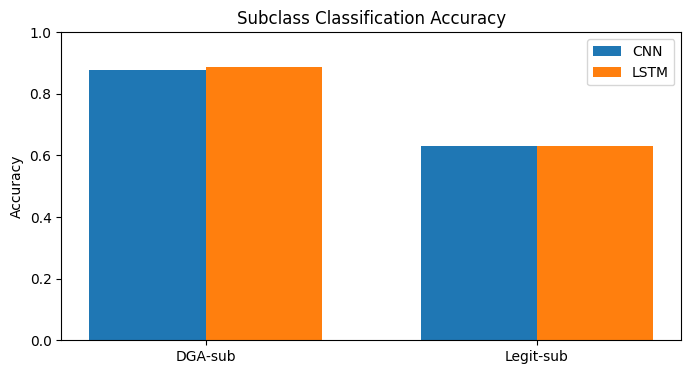

In [ ]:
# Train, evaluate, and compare all 4 models

import matplotlib.pyplot as plt

# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 128


# 3) DGA‑subclass CNN
history_dga_cnn = model_dga_sub.fit(
    X_train_dga, y_train_dga,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)
loss_dga_cnn, acc_dga_cnn = model_dga_sub.evaluate(X_test_dga, y_test_dga)
print(f"DGA‑subclass CNN Test Accuracy: {acc_dga_cnn:.4f}")

# 4) DGA‑subclass LSTM
history_dga_lstm = model_dga_sub_lstm.fit(
    X_train_dga, y_train_dga,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)
loss_dga_lstm, acc_dga_lstm = model_dga_sub_lstm.evaluate(X_test_dga, y_test_dga)
print(f"DGA‑subclass LSTM Test Accuracy: {acc_dga_lstm:.4f}")

# 5) Legit‑subclass CNN
history_legit_cnn = model_legit_sub.fit(
    X_train_legit, y_train_legit,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)
loss_legit_cnn, acc_legit_cnn = model_legit_sub.evaluate(X_test_legit, y_test_legit)
print(f"Legit‑subclass CNN Test Accuracy: {acc_legit_cnn:.4f}")

# 6) Legit‑subclass LSTM
history_legit_lstm = model_legit_sub_lstm.fit(
    X_train_legit, y_train_legit,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)
loss_legit_lstm, acc_legit_lstm = model_legit_sub_lstm.evaluate(X_test_legit, y_test_legit)
print(f"Legit‑subclass LSTM Test Accuracy: {acc_legit_lstm:.4f}")


# --- Plotting Comparison ---

# Subclass Classification Accuracy
tasks = ['DGA‑sub','Legit‑sub']
x = range(len(tasks))
width = 0.35

plt.figure(figsize=(8,4))
plt.bar([i-width/2 for i in x], [acc_dga_cnn, acc_legit_cnn], width, label='CNN')
plt.bar([i+width/2 for i in x], [acc_dga_lstm, acc_legit_lstm], width, label='LSTM')
plt.xticks(x, tasks)
plt.title('Subclass Classification Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend()
plt.show()


In [ ]:

# ---- Comparison Table for Legit/DGA classification ----
import pandas as pd
metrics_df = pd.DataFrame({
    'Model': ['CNN', 'LSTM'],
    'Accuracy': [accuracy_cnn, accuracy_lstm],
    'Precision': [precision_cnn, precision_lstm],
    'Recall': [recall_cnn, recall_lstm],
    'F1-score': [f1_cnn, f1_lstm]
})
display(metrics_df)


,Model,Accuracy,Precision,Recall,F1-score
0,CNN,0.991469,0.992361,0.990563,0.991461
1,LSTM,0.976719,0.982356,0.970875,0.976582
